torch code reference: https://www.edureka.co/blog/pytorch-tutorial/
deep_conv_rf reference: https://github.com/NeuroDataDesign/deep-conv-rf/blob/master/notebooks/DeepConvRFvsRFvsCNN_Baseline_CIFAR_0_vs_2_n_trees_2_layers.ipynb

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load CIFAR10
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
# training set
trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True, num_workers=2)
# testing set
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat','deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

100%|█████████▉| 170409984/170498071 [01:04<00:00, 1912813.85it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


horse   dog   cat   cat


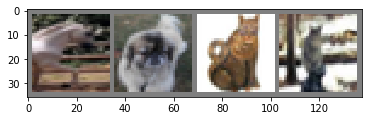

In [3]:
# showing some training images
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
 
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
 
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [4]:
# CNN architecture

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
# create a net object
net = Net()
    
# loss function and optimizer
criterion = nn.CrossEntropyLoss()    # classification cross-entropy loss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# train the network

for epoch in range(2): # loop over dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
    
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training CNN')

[1,  2000] loss: 2.270
[1,  4000] loss: 1.917


170500096it [01:20, 1912813.85it/s]                               

[1,  6000] loss: 1.696
[1,  8000] loss: 1.574
[1, 10000] loss: 1.518
[1, 12000] loss: 1.464
[2,  2000] loss: 1.378
[2,  4000] loss: 1.358
[2,  6000] loss: 1.331
[2,  8000] loss: 1.324
[2, 10000] loss: 1.289
[2, 12000] loss: 1.264
Finished Training CNN


In [6]:
# Test network on test data

# dataiter = iter(testloader)
# images, labels = dataiter.next()
# # print images
# imshow(torchvision.utils.make_grid(images))
# print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


# predicted = torch.max(outputs, 1)


correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
 
print('Accuracy of the network on the 10000 test images: %d %%' % (
100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [7]:
# look at which classes performed well/poorly

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

 
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
    classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 44 %
Accuracy of   car : 82 %
Accuracy of  bird : 53 %
Accuracy of   cat : 39 %
Accuracy of  deer : 20 %
Accuracy of   dog : 21 %
Accuracy of  frog : 71 %
Accuracy of horse : 62 %
Accuracy of  ship : 83 %
Accuracy of truck : 51 %
